In [145]:
import numpy as np

In [146]:
np.random.seed(34)

In [147]:
import keras

In [148]:
from keras.datasets import mnist

In [149]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()

In [150]:
from keras.models import Sequential

In [151]:
from keras.layers import Dense, Convolution2D, Flatten, Activation, MaxPooling2D, Dropout

In [152]:
from keras.optimizers import SGD

In [153]:
import matplotlib.pyplot as plt

In [154]:
X_train.shape[0]

60000

In [155]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [156]:
y_train[0]

5

In [157]:
y_train.shape

(60000,)

In [158]:
X = X_train[0].reshape([28,28])

In [159]:
X.shape

(28, 28)

In [160]:
plt.gray()

<Figure size 640x480 with 0 Axes>

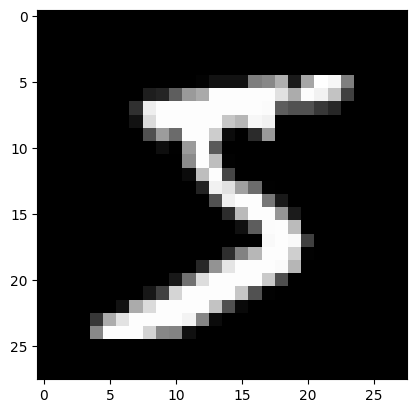

In [161]:
plt.imshow(X)

In [162]:
y_train[101]

7

In [163]:
X_test.shape

(10000, 28, 28)

In [164]:
y_test.shape

(10000,)

In [165]:
type(X_train[0])

numpy.ndarray

In [166]:
X_train =X_train.astype('float32') / 255

In [167]:
X_test =X_test.astype('float32') / 255

In [168]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [169]:
n_classes =10

In [170]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [171]:
X_train.shape

(60000, 28, 28)

In [172]:
y_train.shape

(60000, 10)

In [173]:
#channel=1
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [174]:
model = Sequential()

In [175]:
model.add(Convolution2D(16, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
# (Number_Input_Channels * Kernal_H * Kernal_W * Number_Output_Images) + Number_Output_Images = (1 * 3 * 3 * 32) + 32 = 320
model.add(Convolution2D(32, (3, 3), padding='valid', activation='relu'))
# (Number_Input_Channels * Kernal_H * Kernal_W * Number_Output_Images) + Number_Output_Images = (32 * 3 * 3 * 64) + 64 = 18496
# Output_Shape = (H-1), (W-1),

In [176]:
model.add(MaxPooling2D(pool_size=(2, 2)))  # Only Forward Pass. Not used for Backprop.
# H/2, W/2 = 26/2, 26/2 = 13, 13
model.add(Dropout(0.5))

In [177]:
model.add(Flatten())
# Number_Input_Channels * H * W = 64 * 13 * 13 = 10816

In [178]:
model.add(Dense(10, activation='softmax'))
# (Input_shape * Neurons) + Neurons = (10816 * 10) + 10

In [179]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                54090     
                                                      

In [180]:
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [181]:
model.fit(X_train, y_train, batch_size=10000,epochs=200,verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/200
6/6 [==============================] - 6s 345ms/step - loss: 0.0874 - accuracy: 0.3204 - val_loss: 0.0820 - val_accuracy: 0.6220
Epoch 2/200
6/6 [==============================] - 1s 253ms/step - loss: 0.0755 - accuracy: 0.6244 - val_loss: 0.0625 - val_accuracy: 0.7280
Epoch 3/200
6/6 [==============================] - 2s 281ms/step - loss: 0.0528 - accuracy: 0.7263 - val_loss: 0.0370 - val_accuracy: 0.7907
Epoch 4/200
6/6 [==============================] - 2s 257ms/step - loss: 0.0336 - accuracy: 0.7836 - val_loss: 0.0246 - val_accuracy: 0.8368
Epoch 5/200
6/6 [==============================] - 2s 267ms/step - loss: 0.0248 - accuracy: 0.8321 - val_loss: 0.0192 - val_accuracy: 0.8713
Epoch 6/200
6/6 [==============================] - 2s 264ms/step - loss: 0.0208 - accuracy: 0.8588 - val_loss: 0.0165 - val_accuracy: 0.8895
Epoch 7/200
6/6 [==============================] - 2s 272ms/step - loss: 0.0184 - accuracy: 0.8760 - val_loss: 0.0149 - val_accuracy: 0.9005
Epoch 8/200
6

In [182]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.0015 - accuracy: 0.9897
loss= 0.0015353383496403694
accuracy= 0.9897000193595886


In [183]:
model.predict(X_test[0])

ValueError: ignored

In [187]:
prediction = model.predict(np.expand_dims(X_test[9999], axis=0))
predicted_class = np.argmax(prediction)
print(f"Predicted class for x_test[0]: {predicted_class}")


1/1 [==============================] - 0s 20ms/step
Predicted class for x_test[0]: 6


In [188]:
y_test[9999]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [189]:
prediction

array([[4.9691817e-08, 8.8383051e-12, 2.7400013e-06, 4.3579547e-08,
        2.6355663e-06, 2.5931417e-06, 9.9999154e-01, 7.0011089e-12,
        3.3368525e-07, 6.6939516e-11]], dtype=float32)